### Amazon Review Data Processing

Source Dataset: https://nijianmo.github.io/amazon/index.html#subsets

Download from _"Small" subsets for experimentation_ with the titles:

*     _Movies and TV	5-core (3,410,019 reviews)_

The file is saved in the Google drive data directory, but not tracked in this Github repository due to filesize limitations. The downloaded file name is `Movies_and_TV_5.json.gz`.

In [ ]:
!wget http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Movies_and_TV_5.json.gz -P ./data

--2022-07-18 01:07:32--  http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Movies_and_TV_5.json.gz
Resolving deepyeti.ucsd.edu (deepyeti.ucsd.edu)... 169.228.63.50
Connecting to deepyeti.ucsd.edu (deepyeti.ucsd.edu)|169.228.63.50|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 791322468 (755M) [application/octet-stream]
Saving to: ‘./data/Movies_and_TV_5.json.gz’

Movies_and_TV_5.jso 100%[===================>] 754.66M  40.9MB/s    in 19s     

2022-07-18 01:07:51 (40.3 MB/s) - ‘./data/Movies_and_TV_5.json.gz’ saved [791322468/791322468]



In [ ]:
import os
import gzip
import json
import numpy as np

import shutil
import pandas as pd
import random
from sklearn.model_selection import train_test_split

In [ ]:
# Filepaths of raw zip download
zip_fp = os.path.join(os.getcwd(), "data", "Movies_and_TV_5.json.gz")

# Unzipped JSON:
out_fp = os.path.join(os.getcwd(), "data", "Movies_and_TV_5.json")

In [ ]:
with gzip.open(zip_fp, "rb") as f_in:
    with open(out_fp, "wb") as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
### load the "Small" subsets of data

data = []
with open(out_fp,"r") as f:
    for l in f:
        data.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(data))

# first row of the list
print(data[0])

3410019
{'overall': 5.0, 'verified': True, 'reviewTime': '11 9, 2012', 'reviewerID': 'A2M1CU2IRZG0K9', 'asin': '0005089549', 'style': {'Format:': ' VHS Tape'}, 'reviewerName': 'Terri', 'reviewText': "So sorry I didn't purchase this years ago when it first came out!!  This is very good and entertaining!  We absolutely loved it and anticipate seeing it repeatedly.  We actually wore out the cassette years back, so we also purchased this same product on cd.  Best purchase we made out of all!  Would purchase on dvd if we could find one.", 'summary': 'Amazing!', 'unixReviewTime': 1352419200}


In [ ]:
# convert list into pandas dataframe

df1 = pd.DataFrame.from_dict(data)

print(len(df1))

3410019


In [ ]:
df1

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"11 9, 2012",A2M1CU2IRZG0K9,0005089549,{'Format:': ' VHS Tape'},Terri,So sorry I didn't purchase this years ago when...,Amazing!,1352419200,NaN,NaN
1,5.0,True,"12 30, 2011",AFTUJYISOFHY6,0005089549,{'Format:': ' VHS Tape'},Melissa D. Abercrombie,Believe me when I tell you that you will recei...,Great Gospel VHS of the Cathedrals!,1325203200,NaN,NaN
2,5.0,True,"04 21, 2005",A3JVF9Y53BEOGC,000503860X,{'Format:': ' DVD'},Anthony Thompson,"I have seen X live many times, both in the ear...",A great document of a great band,1114041600,11,NaN
3,5.0,True,"04 6, 2005",A12VPEOEZS1KTC,000503860X,{'Format:': ' DVD'},JadeRain,"I was so excited for this! Finally, a live co...",YES!! X LIVE!!,1112745600,5,NaN
4,5.0,True,"12 3, 2010",ATLZNVLYKP9AZ,000503860X,{'Format:': ' DVD'},T. Fisher,X is one of the best punk bands ever. I don't ...,X have still got it,1291334400,5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3410014,4.0,True,"01 1, 2017",A2MFARH7H7FSY1,B01HJ1INB0,{'Format:': ' DVD'},Ali A. Diba,The singing parts are very good as expected fr...,Verdi's Otello,1483228800,4,NaN
3410015,5.0,True,"12 6, 2016",AY532XZ00UTKN,B01HJ1INB0,{'Format:': ' Blu-ray'},Amazon Customer,This recording of the 2015 production by the M...,Verdi's Take on Shakespear's Othello,1480982400,8,NaN
3410016,4.0,False,"12 6, 2016",A2VWQXWF1GO2ZE,B01HJ1INB0,{'Format:': ' Blu-ray'},Noam Eitan,I do not wish to write a review about this rel...,"Voices on all MET video releases, broadcasts a...",1480982400,11,NaN
3410017,5.0,False,"11 6, 2016",A22AB77OD50U4M,B01HJ1INB0,{'Format:': ' Blu-ray'},Amazon Customer,It was a gift.,Five Stars,1478390400,NaN,NaN


In [ ]:
df1.iloc[0]

overall                                                         5.0
verified                                                       True
reviewTime                                               11 9, 2012
reviewerID                                           A2M1CU2IRZG0K9
asin                                                     0005089549
style                                      {'Format:': ' VHS Tape'}
reviewerName                                                  Terri
reviewText        So sorry I didn't purchase this years ago when...
summary                                                    Amazing!
unixReviewTime                                           1352419200
vote                                                            NaN
image                                                           NaN
Name: 0, dtype: object

Next, we want to explore the distribution of "Overall" ratings by calculating the average rating in this small category. For _Movies and TV_ subset, the average rating is 4.22 stars. We also plot a histogram and count on each value (1.0 - 5.0) to look at the distribution.

In [ ]:
#Read the data
def parse(path):
  g = open(path, 'r')
  for l in g:
    yield json.loads(l)

ratings = []

for review in parse(out_fp):
  ratings.append(review['overall'])

print(sum(ratings) / len(ratings))

4.221320174462371


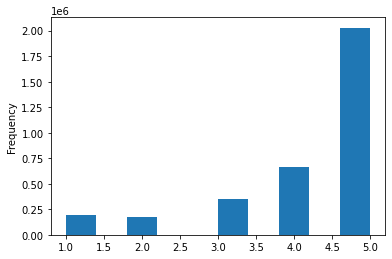

In [ ]:
df1["overall"].plot.hist(bins=10)

In [ ]:
df1["overall"].value_counts()

5.0    2028791
4.0     665920
3.0     349700
1.0     193169
2.0     172439
Name: overall, dtype: int64

We decide to randomly select 100% of raw data as a sample data for training, test, and validation. We also set a random seed to select data that are reproducible.

In order to avoid out-of-memory issue, we break down the files into parts for every 50,000 records. Each part only contains 50,000 or less records.

Next, we remove reviews with 3 - 4 ratings and categorize 1-2 as negative (bad) reviews and 5 as positive (good) reviews.

In [ ]:
with open(out_fp, "r") as f:
    
    # Initialize:
    sample_data = list()
    selected, saved = 0, False
    part = 1
    eligible = 0
    
    # Random seeds generator:
    random.seed(16)
    rand_gen = (random.randint(1, 100) for _ in range(1000000000))
    
    # Iterate through all reviews:
    for i, line in enumerate(f):

        # If the reviews contains 3 or 4 ratings, we consider
        # them to be neutral and discard them, only keep 1/2 and 5:
        true, false=True, False
        data = eval(line)
        rating = data["overall"]
        discard = rating >= 3 and rating <= 4
        if discard:
            continue
        eligible += 1

        # Randomly select 100% of records (% can be adjusted):
        if next(rand_gen) <= 100:  
            selected += 1
            sample_data.append(data)
            saved = False
        else:
            continue        

        # Save the part files at the beginning:
        if (not selected % 50_000) and (selected != 0) and (not saved):
            pt = f"{part:.0f}".zfill(4)
            part_name = f"Part{pt}_Movies_and_TV_5.json"
            part_fp = os.path.join(os.getcwd(), "data", part_name)
            with open(part_fp, "w") as part_f:
                json.dump(sample_data, part_f)
            part += 1
            sample_data = list()
            saved = True

# Save the last part file at the end:
if len(sample_data):
    pt = f"{part:.0f}".zfill(4)
    part_name = f"Part{pt}_Movies_and_TV_5.json"
    part_fp = os.path.join(os.getcwd(), "data", part_name)
    with open(part_fp, "w") as part_f:
        json.dump(sample_data, part_f)

Finally we combine the parts and load the parts json files into one single pandas DataFrame.

In [ ]:
df = pd.DataFrame()

files = [f for f in os.listdir(os.path.join(os.getcwd(), "data")) if "Part" in f]
print(files)
for part_name in files:
    part_fp = os.path.join(os.getcwd(), "data", part_name)
    print(part_fp)
    with open(part_fp, "r") as part_file:
        part_data = json.load(part_file)
        part_df = pd.DataFrame(part_data)
        df = df.append(part_df).reset_index(drop=True)

['Part0041_Movies_and_TV_5.json', 'Part0003_Movies_and_TV_5.json', 'Part0040_Movies_and_TV_5.json', 'Part0033_Movies_and_TV_5.json', 'Part0025_Movies_and_TV_5.json', 'Part0011_Movies_and_TV_5.json', 'Part0021_Movies_and_TV_5.json', 'Part0032_Movies_and_TV_5.json', 'Part0022_Movies_and_TV_5.json', 'Part0028_Movies_and_TV_5.json', 'Part0008_Movies_and_TV_5.json', 'Part0048_Movies_and_TV_5.json', 'Part0047_Movies_and_TV_5.json', 'Part0030_Movies_and_TV_5.json', 'Part0037_Movies_and_TV_5.json', 'Part0002_Movies_and_TV_5.json', 'Part0045_Movies_and_TV_5.json', 'Part0031_Movies_and_TV_5.json', 'Part0024_Movies_and_TV_5.json', 'Part0042_Movies_and_TV_5.json', 'Part0035_Movies_and_TV_5.json', 'Part0013_Movies_and_TV_5.json', 'Part0034_Movies_and_TV_5.json', 'Part0038_Movies_and_TV_5.json', 'Part0029_Movies_and_TV_5.json', 'Part0001_Movies_and_TV_5.json', 'Part0043_Movies_and_TV_5.json', 'Part0007_Movies_and_TV_5.json', 'Part0010_Movies_and_TV_5.json', 'Part0015_Movies_and_TV_5.json', 'Part0009

In [ ]:
df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5.0,3,True,"05 5, 2015",A1WG9XOD4NC69C,B00U7M7UPY,{'Format:': ' Blu-ray'},H. Drummond,Absolutely mesmerizing. I had an entire set o...,Getting Mr. Turner,1430784000,NaN
1,5.0,3,False,"05 1, 2015",A16CZRQL23NOIW,B00U7M7UPY,{'Format:': ' DVD'},Hiram Gmez Pardo Venezuela,"Chapeaux for Mike Leigh as director, Timothy S...",Ladies and gentlemen: hats off!,1430438400,NaN
2,5.0,NaN,True,"05 1, 2015",A2YDXIXMX5B0HC,B00U7M7UPY,{'Format:': ' Prime Video'},Allen,Wonderful film and cast,Five Stars,1430438400,NaN
3,5.0,3,False,"04 30, 2015",A1KMG1AIUS00DC,B00U7M7UPY,{'Format:': ' Blu-ray'},The Movie Man,Mr. Turner covers the final 25 years in the li...,Outstanding portrait of a working artist,1430352000,NaN
4,2.0,6,True,"04 29, 2015",A3EFDHSXVWE4EL,B00U7M7UPY,{'Format:': ' Prime Video'},Victoria,B-o-r-i-n-g...I couldn't understand what the a...,Not for those who have not lived in the UK,1430265600,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2394394,5.0,4,True,"02 6, 2010",A9I608DSOJ2XP,B0015Q818G,{'Format:': ' DVD'},C. Smith,I ran across this show on the BBCA and I was h...,best british show ever,1265414400,NaN
2394395,1.0,11,False,"04 21, 2008",A1C7DTTCSMHPUQ,B0015QT76Q,{'Format:': ' DVD'},TEXAS ROCKS!,I do not understand what the problem is. They ...,What's the hold up?,1208736000,NaN
2394396,5.0,61,False,"04 14, 2008",A3FSYD0SS354NM,B0015QT76Q,{'Format:': ' DVD'},Darcy Shepard,"Season 7 has some of the classic episodes - ""M...",The Much-Anticipated Spectacular Seventh Season,1208131200,NaN
2394397,5.0,5,False,"11 26, 2011",AYZV1PJP6NXPT,B0015QT76Q,{'Format:': ' DVD'},R. Long,I can't understand why ONLY SIX seasons of Kin...,"Mike Judge Fan here. Please, MORE King of the ...",1322265600,NaN


In [ ]:
# Inspect "Overall" ratings after data pre-processing
# Notice that rating 3.0 and 4.0 are removed
df['overall'].value_counts()

5.0    2028791
1.0     193169
2.0     172439
Name: overall, dtype: int64

In [ ]:
# Create a new label in the dataframe
POSITIVE=1
NEGATIVE=0
df["rating_label"] = np.where(df["overall"] == 5.0, POSITIVE, NEGATIVE)

print(df["rating_label"])

0          1
1          1
2          1
3          1
4          0
          ..
2394394    1
2394395    0
2394396    1
2394397    1
2394398    1
Name: rating_label, Length: 2394399, dtype: int64


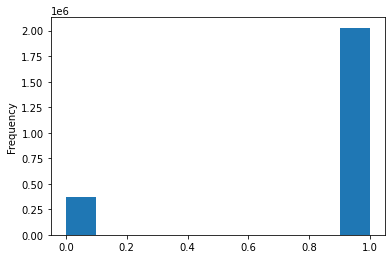

In [ ]:
# Plot a histogram to show the distribution of positive/negative rating label
df["rating_label"].plot.hist(bins=10)

Based on the histogram distribution of the ratings label, we notice a class imbalance issue in this dataset. Therefore, we will need to undersample some of the positive labels to alleviate the class imbalance impact.

In [ ]:
# Count the number of postive labels:
positive_label = len(df[(df["rating_label"] == POSITIVE)])
print(positive_label)

2028791


In [ ]:
# Count the number of negative labels:
negative_label = len(df[(df["rating_label"] == NEGATIVE)])
print(negative_label)

365608


In [ ]:
# Sample the same amount of negative labels from positive labels
positive_df_sampled = df[(df["rating_label"] == POSITIVE)].sample(n=negative_label, random_state=16)

In [ ]:
# Append the sampled positive labels to the existing negative labels
negative_df = df[(df["rating_label"] == NEGATIVE)]

new_balanced_df = negative_df.append(positive_df_sampled)

In [ ]:
# Check the balance of new Dataframe
new_balanced_df["rating_label"].mean()

0.5

In [ ]:
# Reset Index for  the new balanced Dataframe
new_balanced_df = new_balanced_df.reset_index(drop=True)

In [ ]:
new_balanced_df

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image,rating_label
0,2.0,6,True,"04 29, 2015",A3EFDHSXVWE4EL,B00U7M7UPY,{'Format:': ' Prime Video'},Victoria,B-o-r-i-n-g...I couldn't understand what the a...,Not for those who have not lived in the UK,1430265600,NaN,0
1,2.0,2,True,"04 25, 2015",AS6S9S5NS0BMI,B00U7M7UPY,{'Format:': ' Prime Video'},Reviewer,The paintings are more inspiring than the film...,Such high hopes...,1429920000,NaN,0
2,2.0,NaN,True,"08 24, 2015",A2K4PH68WESPT4,B00U7XR5T4,{'Format:': ' Prime Video'},Elwood Belzer,Just didn't so anything for me. There just wa...,Two Stars,1440374400,NaN,0
3,1.0,12,False,"06 21, 2015",A25654F6R2GT87,B00U7XR5T4,{'Format:': ' Blu-ray'},M. Hafner,Just a warning: What you get on this Blu Ray i...,"VHS quality, not HD!",1434844800,NaN,0
4,2.0,5,False,"05 30, 2015",A2R1GFS6P1PC18,B00U7XR5T4,{'Format:': ' DVD'},Peter Baklava,"This is pretty much a throwaway movie, an Ital...",Not a Great Outing for Anyone Involved,1432944000,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
731211,5.0,NaN,True,"03 1, 2016",A2YSVTDEOE4MTN,B001CDKQ8K,{'Format:': ' DVD'},GEORGE P. COVILLE,I just wish there was more.,Five Stars,1456790400,NaN,1
731212,5.0,NaN,True,"05 21, 2010",A2QEZSN0PPOQY1,B002WNUVJS,{'Format:': ' DVD'},K. Pring,"Having never read the comic book, I have to sa...","Planet Hulk, certainly unique",1274400000,NaN,1
731213,5.0,NaN,True,"06 7, 2016",A207GLSNQ8QZHM,6304994567,{'Format:': ' Amazon Video'},MS,One of the Coen Brothers best. Actually saw i...,"Well that's like your opinion, man",1465257600,NaN,1
731214,5.0,NaN,True,"10 15, 2015",A2HJJ6CDOYN6EF,B00O2IZPD8,{'Format:': ' Amazon Video'},Rodney R. Willcoxson,love it,Five Stars,1444867200,NaN,1


In [ ]:
# Save the new balanced Dataframe into csv
fp = os.path.join(os.getcwd(), "data", "new_balanced_df.csv")
new_balanced_df.to_csv(fp, encoding="utf-8", index=False)